# Lead Scoring Assigment 

### Section -1 : Importing Libraries & Data Files

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
#importing the leads file and assigning it
leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


leads.csv file was imported perfectly.

### Section-2 : Data Checking

In [3]:
#Checking data frame shape
leads.shape

(9240, 37)

In [4]:
#Checking data frame column data types
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Checking data frame details
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Section-3 :  EXPLORATORY DATA ANALYSIS

In [6]:
# Check for duplicates for lead number & lead origin
duplicates = leads.duplicated(subset=['Prospect ID', 'Lead Number'])
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


In [7]:
# Removal of the first two columns i.e. Prospect ID & Lead Number, as they are unique ids which would not be required for analysis
leads = leads.iloc[:,2:]

In [8]:
# Re- Checking the data frame
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# checking null value count

null_vals = leads.isnull().sum()
null_vals

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [10]:
# checking null value count in percentage

null_valperc = 100*(null_vals/leads.shape[0])
print(null_valperc)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [11]:
#dropping values with missing values more than 40%

rem_col = null_valperc[null_valperc>40].index
leads = leads.drop(columns=rem_col)
leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,No,wrong number given,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,No,invalid number,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,No,NaN,No,No,NaN,Other Metro Cities,No,No,SMS Sent


In [12]:
#checking updated missing value count in %

(leads.isnull().sum()/leads.shape[0])*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [13]:
# dealing with 'Tags' column

leads['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [14]:
# As 'tags' are important and cannot be removed, we need to replace the NaN with a default - 'Unkown'

leads['Tags'] = leads['Tags'].replace(np.nan,'Unkown')
leads['Tags'].value_counts(dropna = False)

Unkown                                               3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [15]:
#checking updated missing value count in %

(leads.isnull().sum()/leads.shape[0])*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [16]:
# dealing with 'Lead Profile' column
leads['Lead Profile'].value_counts(dropna = False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
leads['Lead Profile'] = leads['Lead Profile'].replace('Select',np.nan)
leads['Lead Profile'].value_counts(dropna = False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [18]:
#Counting null values again
(leads['Lead Profile'].value_counts(dropna = False)/leads['Lead Profile'].shape)*100

NaN                            74.188312
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

With a 74% missing values, this column needs to be dropped

In [19]:
# droping lead profile column
leads = leads.drop(columns=['Lead Profile'])

In [20]:
#checking updated missing value count in %

(leads.isnull().sum()/leads.shape[0])*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [21]:
# dealing with 'What is your current occupation' column

leads['What is your current occupation']
leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
# Value of 'Unemployed' is too high, thus we are replacing all NaN with 'Unemployed'

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')
leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
#checking updated missing value count in %

(leads.isnull().sum()/leads.shape[0])*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                   0.000000
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [24]:
# dealing with 'What matters most to you in choosing a course' column

leads['What matters most to you in choosing a course']
leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
# Value of 'Better Career Prospects' is too high, thus we are replacing all NaN with 'Better Career Prospects'

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
# dealing with 'Country' column

leads['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [27]:
# Value of 'India' is too high, thus we are replacing all NaN with 'India'

leads['Country'] = leads['Country'].replace(np.nan,'India')
leads['Country'].value_counts(dropna = False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [28]:
# dealing with 'What matters most to you in choosing a course' column

leads['How did you hear about X Education'].value_counts(dropna = False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

The value 'Select' is like a null value, thus it needs to be replaced with np.nan

In [29]:
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select',np.nan)
leads['How did you hear about X Education'].value_counts(dropna = False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [30]:
#checking updated missing value count in %

leads['How did you hear about X Education'].value_counts(dropna = False)/leads['How did you hear about X Education'].shape

NaN                      0.784632
Online Search            0.087446
Word Of Mouth            0.037662
Student of SomeSchool    0.033550
Other                    0.020130
Multiple Sources         0.016450
Advertisements           0.007576
Social Media             0.007251
Email                    0.002814
SMS                      0.002489
Name: How did you hear about X Education, dtype: float64

In [31]:
#78% missing values means, this column needs to go

leads = leads.drop(columns=['How did you hear about X Education'])


In [32]:
#checking updated missing value count in %

(leads.isnull().sum()/leads.shape[0])*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                   15.562771
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [33]:
# dealing with 'Specialization' column

leads['Specialization'].value_counts(dropna = False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

The value 'Select' is like a null value, thus it needs to be replaced with np.nan

In [34]:
leads['Specialization'] = leads['Specialization'].replace('Select',np.nan)
leads['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [35]:
leads['Specialization'].value_counts(dropna = False)/leads['Specialization'].shape

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [36]:
#Specialization is below 40%, so lets not remove it. 'Specialization' might not be there for all students thus it makes sense to replace this value with 'NA'
leads['Specialization'] = leads['Specialization'].replace(np.nan,'NA')
leads['Specialization'].value_counts(dropna = False)


NA                                   3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [37]:
# dealing with 'City' column

leads['City'].value_counts(dropna = False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

First we deal with 'Select' in the same way

In [38]:
leads['City'] = leads['City'].replace('Select',np.nan)

In [39]:
leads['City'].value_counts(dropna = False)/leads['City'].shape

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [40]:
# As value of 'Mumbai' is much higher compare to other values. It will replace NaN
leads['City'] = leads['City'].replace(np.nan,'Mumbai')
leads['City'].value_counts(dropna = False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [41]:
#checking updated missing value count in %

(leads.isnull().sum()/leads.shape[0])*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [42]:
# dealing with 'Last Activity' column

leads['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [43]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails', 'Visited Booth in Tradeshow'],'Others')

In [44]:
#checking updated missing value count in %

(leads.isnull().sum()/leads.shape[0])*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [45]:
# TotalVisits and Page Views Per Visit, as less than 2% values are missing in this, we will remove the rows

leads = leads.dropna()

All null values removed

In [46]:
#checking updated missing value count in %

(leads.isnull().sum()/leads.shape[0])*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         


### Section-4  EDA Columnwise Analysis

In [47]:
#checking value counts of Lead Origin column

leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

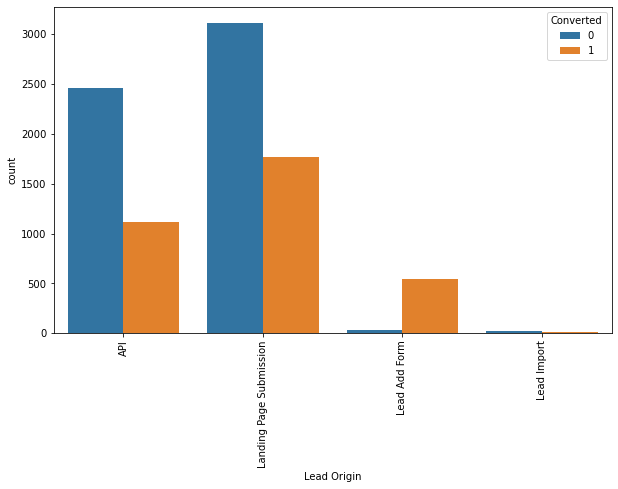

In [48]:
#Countplot of 'Lead Origin' column wrt 'Converted'

plt.figure(figsize=(10,6))
s1=sns.countplot(x='Lead Origin', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

 
**OBESERVATIONS**

*   As API and Landing Page Submission origins bring a higher number of leads, we need to focus on improving the conversion rate of these two, and also generate more leads from the Lead Add Form.
*   The Lead Add Form has a very high conversion rate, but the count of leads is not very high.
*   Lead Import and Quick Add Form generate very few leads.







In [49]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release', 'youtubechannel','welearnblog_Home', 'WeLearn','blog','Pay per Click Ads', 'testone','NC_EDM'] ,'Others')                                                   


In [50]:
leads['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Social Media          33
Others                19
Live Chat              2
Name: Lead Source, dtype: int64

In [51]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [52]:
#combining low frequency values in Last Notable Activity

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable', 'Had a Phone Conversation','Email Marked Spam', 'Approached upfront','Resubscribed to emails','View in browser link Clicked', 'Form Submitted on Website','Email Received'] ,'Others')

In [53]:
#checking value counts of Lead Source column

leads['TotalVisits'].value_counts(dropna=False)

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

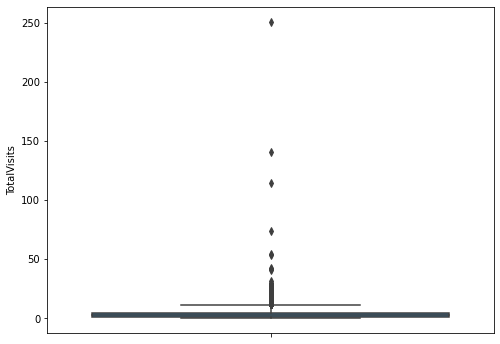

In [54]:
#Total Visits
#Plotting TotalVisits

plt.figure(figsize=(8,6))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [55]:
#checking out the percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

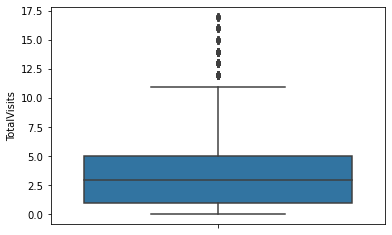

In [56]:
#Outlier Treatment: Removing the top & bottom 1% of the 'Total Visits' Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

Moving on to the next column

In [57]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
5%          0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
95%      1555.500000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

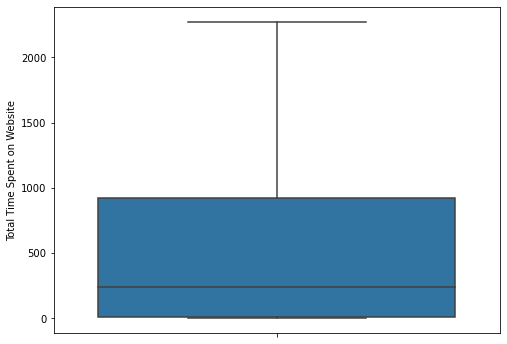

In [58]:
#plotting it on boxplot

plt.figure(figsize=(8,6))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

Clearly, nothing is needed here, moving on to the next column

In [59]:
#checking the distribution of 'Page Views Per Visit'

leads['Page Views Per Visit'].describe()

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

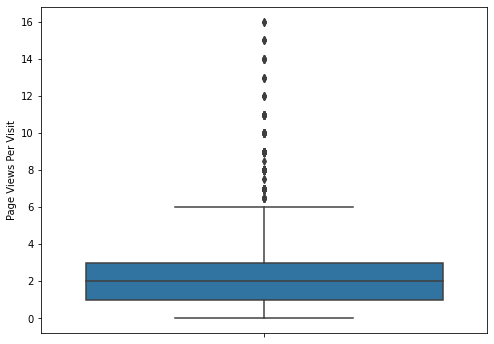

In [60]:
#visualizing spread of 'Page Views Per Visit'

plt.figure(figsize=(8,6))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

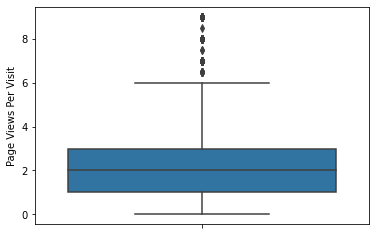

In [61]:
#Outlier Treatment: Removing the top & bottom 1% of the 'Page Views Per Visit' Outlier values

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[(leads['Page Views Per Visit'] <= Q3)]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[(leads['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

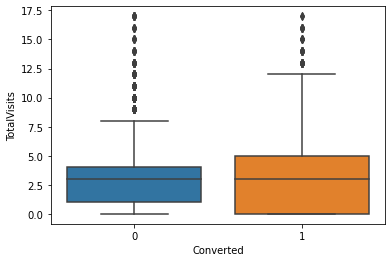

In [62]:
#checking sidtribution of "Total Visits" vs Converted variable by putting both in boxplot

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

This does not conclude much as total visits does not seem to have much effect on conversions

### Dealing with categorical variables

In [63]:
# list of categorical variables

catgrcl = leads.select_dtypes(include=['object']).columns
catgrcl

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [64]:
# Mapping all boolean type variables 
vari =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[vari] = leads[vari].apply(binary_map)

In [65]:
leads['Specialization'].value_counts(dropna=False)

NA                                   3262
Finance Management                    942
Human Resource Management             819
Marketing Management                  814
Operations Management                 494
Business Administration               390
IT Projects Management                360
Supply Chain Management               338
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
Healthcare Management                 150
E-COMMERCE                            107
Hospitality Management                107
Retail Management                      95
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [66]:
#we are making some categorical variables into numerical by getting dummy and we also drop the first column and add the results to the master dataframe

dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation', 'City']], drop_first=True)
leads = pd.concat([leads,dummy],1)

In [67]:
leads['Specialization']

0                              NA
1                              NA
2         Business Administration
3           Media and Advertising
4                              NA
                  ...            
9235       IT Projects Management
9236        Media and Advertising
9237      Business Administration
9238    Human Resource Management
9239      Supply Chain Management
Name: Specialization, Length: 8924, dtype: object

In [68]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_NA'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [69]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [70]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [71]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                   3221
Email Opened               2785
SMS Sent                   2123
Page Visited on Website     288
Olark Chat Conversation     182
Email Link Clicked          170
Others                      155
Name: Last Notable Activity, dtype: int64

In [72]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Unkown'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [73]:
#dropping actual columns after dummy variable creation
leads.drop(catgrcl,1,inplace = True)

In [74]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Section-5 Logistic Regression

In [75]:
# Putting response variable to y
y = leads['Converted']
y.head()
X=leads.drop('Converted', axis=1)

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6246 entries, 6676 to 5847
Data columns (total 77 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   TotalVisits                                             6246 non-null   float64
 1   Total Time Spent on Website                             6246 non-null   int64  
 2   Page Views Per Visit                                    6246 non-null   float64
 3   Lead Origin_Landing Page Submission                     6246 non-null   uint8  
 4   Lead Origin_Lead Add Form                               6246 non-null   uint8  
 5   Lead Origin_Lead Import                                 6246 non-null   uint8  
 6   What is your current occupation_Housewife               6246 non-null   uint8  
 7   What is your current occupation_Other                   6246 non-null   uint8  
 8   What is your current occupation_Stu

### Data Scalling

In [78]:
#scaling numeric columns
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
6676,-0.049636,1.395668,0.395289,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6138,0.297929,0.609686,0.926758,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8650,-0.049636,1.178657,0.395289,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3423,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6552,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Model Building using Statsmodel & RFE

In [79]:
logy = LogisticRegression()
rfe = RFE(logy)  
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe

RFE(estimator=LogisticRegression())

In [81]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True])

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('What is your current occupation_Housewife', False, 26),
 ('What is your current occupation_Other', False, 36),
 ('What is your current occupation_Student', False, 7),
 ('What is your current occupation_Unemployed', False, 6),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 35),
 ('City_Other Cities of Maharashtra', False, 34),
 ('City_Other Metro Cities', False, 10),
 ('City_Thane & Outskirts', False, 28),
 ('City_Tier II Cities', False, 3),
 ('Specialization_Banking, Investment And Insurance', False, 33),
 ('Specialization_Business Administration', False, 27),
 ('Specialization_E-Business', False, 14),
 ('Specialization_E-COMMERCE', False, 37),
 ('Specialization_Finance Management', False, 17),
 

In [83]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Olark Chat',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Graduation in progress',
       'Tags_In confusion whether part time or DLP',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lateral stude

In [84]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Services Excell

In [85]:
#Building First Model

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6207
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1245.7
Date:                Sun, 19 Mar 2023   Deviance:                       2491.5
Time:                        11:55:13   Pearson chi2:                 9.67e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6052
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.0407      0.195    -10.454      0.000      -2.423      -1.658
Total Time Spent on Website                                1.0989      0.061     17.956      0.000       0.979       1.219
Lead Origin_Landing Page Submission                       -0.7798      0.138     -5.647      0.000      -1.050      -0.509
Lead Origin_Lead Add Form                                  1.0820      0.437      2.476      0.013       0.226       1.938
What is your current occupation_Working Professional       0.9241      0.387      2.390      0.017       0.166       1.682
Specialization_Hospitality Management                     -0.8580      0.506     -1.697      0.090      -1.849       0.133
Specialization_IT Projects Management                      0.3866      0.292      1.323      0.186      -0.186       0.959
Specialization_Rural and Agribusiness                     -0.7604      0.745     -1.020      0.308      -2.221       0.701
Specialization_Supply Chain Management                    -0.6728      0.316     -2.129      0.033      -1.292      -0.054
Specialization_Travel and Tourism                         -0.7860      0.417     -1.885      0.059      -1.603       0.031
Lead Source_Olark Chat                                     0.8732      0.166      5.265      0.000       0.548       1.198
Lead Source_Referral Sites                                -0.3904      0.490     -0.796      0.426      -1.351       0.571
Lead Source_Welingak Website                               3.7560      0.846      4.441      0.000       2.098       5.414
Last Activity_Converted to Lead                           -1.0267      0.383     -2.681      0.007      -1.777      -0.276
Last Activity_Email Bounced                               -1.4435      0.549     -2.630      0.009      -2.519      -0.368
Last Activity_Email Opened                                 0.8030      0.184      4.367      0.000       0.443       1.163
Last Activity_Olark Chat Conversation                     -1.1194      0.277     -4.037      0.000      -1.663      -0.576
Last Activity_SMS Sent                                     2.4313      0.190     12.774      0.000       2.058       2.804
Tags_Already a student                                    -3.0125      0.605     -4.981      0.000      -4.198      -1.827
Tags_Busy                                                  1.0251      0.233      4.408      0.000       0.569       1.481
Tags_Closed by Horizzon                                    6.0963      0.743      8.208      0.000       4.641       7.552
Tags_Diploma holder (Not Eligible)                        -2.8153      1.073     -2.624      0.009      -4.918      -0.712
Tags_Gra

In [86]:
#dropping the column with high p-value
col = col.drop('Lead Source_Referral Sites',1)

In [87]:
#Building the second model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.1
Date:                Sun, 19 Mar 2023   Deviance:                       2492.2
Time:                        11:55:13   Pearson chi2:                 9.68e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6052
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.0653      0.193    -10.705      0.000      -2.443      -1.687
Total Time Spent on Website                                1.1004      0.061     17.981      0.000       0.980       1.220
Lead Origin_Landing Page Submission                       -0.7653      0.137     -5.588      0.000      -1.034      -0.497
Lead Origin_Lead Add Form                                  1.0997      0.436      2.521      0.012       0.245       1.955
What is your current occupation_Working Professional       0.9301      0.387      2.404      0.016       0.172       1.688
Specialization_Hospitality Management                     -0.8558      0.506     -1.693      0.090      -1.847       0.135
Specialization_IT Projects Management                      0.3893      0.292      1.332      0.183      -0.183       0.962
Specialization_Rural and Agribusiness                     -0.7549      0.746     -1.012      0.311      -2.216       0.707
Specialization_Supply Chain Management                    -0.6726      0.316     -2.127      0.033      -1.292      -0.053
Specialization_Travel and Tourism                         -0.7840      0.417     -1.882      0.060      -1.600       0.032
Lead Source_Olark Chat                                     0.8916      0.164      5.422      0.000       0.569       1.214
Lead Source_Welingak Website                               3.7575      0.846      4.442      0.000       2.100       5.415
Last Activity_Converted to Lead                           -1.0193      0.383     -2.660      0.008      -1.770      -0.268
Last Activity_Email Bounced                               -1.4340      0.549     -2.614      0.009      -2.509      -0.359
Last Activity_Email Opened                                 0.8098      0.184      4.409      0.000       0.450       1.170
Last Activity_Olark Chat Conversation                     -1.1123      0.277     -4.011      0.000      -1.656      -0.569
Last Activity_SMS Sent                                     2.4423      0.190     12.861      0.000       2.070       2.815
Tags_Already a student                                    -3.0091      0.605     -4.975      0.000      -4.195      -1.824
Tags_Busy                                                  1.0255      0.232      4.411      0.000       0.570       1.481
Tags_Closed by Horizzon                                    6.0991      0.743      8.213      0.000       4.644       7.555
Tags_Diploma holder (Not Eligible)                        -2.8100      1.073     -2.619      0.009      -4.913      -0.707
Tags_Graduation in progress                               -0.5386      0.497     -1.083      0.279      -1.514       0.436
Tags_In 

'All' the p-values are less hence we should  check the Variance Inflation Factor

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.97
15,Last Activity_SMS Sent,2.25
13,Last Activity_Email Opened,2.24
31,Tags_Will revert after reading the email,2.16
9,Lead Source_Olark Chat,2.05
2,Lead Origin_Lead Add Form,1.97
14,Last Activity_Olark Chat Conversation,1.56
0,Total Time Spent on Website,1.46
28,Tags_Ringing,1.39
10,Lead Source_Welingak Website,1.33


VIF is generally low

In [89]:
#BUILDING The third model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.1
Date:                Sun, 19 Mar 2023   Deviance:                       2492.2
Time:                        11:55:16   Pearson chi2:                 9.68e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6052
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.0653      0.193    -10.705      0.000      -2.443      -1.687
Total Time Spent on Website                                1.1004      0.061     17.981      0.000       0.980       1.220
Lead Origin_Landing Page Submission                       -0.7653      0.137     -5.588      0.000      -1.034      -0.497
Lead Origin_Lead Add Form                                  1.0997      0.436      2.521      0.012       0.245       1.955
What is your current occupation_Working Professional       0.9301      0.387      2.404      0.016       0.172       1.688
Specialization_Hospitality Management                     -0.8558      0.506     -1.693      0.090      -1.847       0.135
Specialization_IT Projects Management                      0.3893      0.292      1.332      0.183      -0.183       0.962
Specialization_Rural and Agribusiness                     -0.7549      0.746     -1.012      0.311      -2.216       0.707
Specialization_Supply Chain Management                    -0.6726      0.316     -2.127      0.033      -1.292      -0.053
Specialization_Travel and Tourism                         -0.7840      0.417     -1.882      0.060      -1.600       0.032
Lead Source_Olark Chat                                     0.8916      0.164      5.422      0.000       0.569       1.214
Lead Source_Welingak Website                               3.7575      0.846      4.442      0.000       2.100       5.415
Last Activity_Converted to Lead                           -1.0193      0.383     -2.660      0.008      -1.770      -0.268
Last Activity_Email Bounced                               -1.4340      0.549     -2.614      0.009      -2.509      -0.359
Last Activity_Email Opened                                 0.8098      0.184      4.409      0.000       0.450       1.170
Last Activity_Olark Chat Conversation                     -1.1123      0.277     -4.011      0.000      -1.656      -0.569
Last Activity_SMS Sent                                     2.4423      0.190     12.861      0.000       2.070       2.815
Tags_Already a student                                    -3.0091      0.605     -4.975      0.000      -4.195      -1.824
Tags_Busy                                                  1.0255      0.232      4.411      0.000       0.570       1.481
Tags_Closed by Horizzon                                    6.0991      0.743      8.213      0.000       4.644       7.555
Tags_Diploma holder (Not Eligible)                        -2.8100      1.073     -2.619      0.009      -4.913      -0.707
Tags_Graduation in progress                               -0.5386      0.497     -1.083      0.279      -1.514       0.436
Tags_In 

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.97
15,Last Activity_SMS Sent,2.25
13,Last Activity_Email Opened,2.24
31,Tags_Will revert after reading the email,2.16
9,Lead Source_Olark Chat,2.05
2,Lead Origin_Lead Add Form,1.97
14,Last Activity_Olark Chat Conversation,1.56
0,Total Time Spent on Website,1.46
28,Tags_Ringing,1.39
10,Lead Source_Welingak Website,1.33


Things are fine, now derive the Probabilities, Lead Score, Predictions on Train Data:



In [91]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.983421
6138    0.992236
8650    0.991625
3423    0.037233
6552    0.209067
1696    0.238612
2110    0.987847
6830    0.527303
2581    0.017291
5927    0.024776
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98342085, 0.99223636, 0.99162545, 0.03723314, 0.20906731,
       0.23861189, 0.98784698, 0.52730348, 0.0172914 , 0.02477625])

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.983421,6676
1,1,0.992236,6138
2,1,0.991625,8650
3,0,0.037233,3423
4,0,0.209067,6552


In [94]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.983421,6676,1
1,1,0.992236,6138,1
2,1,0.991625,8650,1
3,0,0.037233,3423,0
4,0,0.209067,6552,0


In [95]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3692  179]
 [ 292 2083]]


In [96]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9245917387127762


In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8770526315789474

In [99]:
# Let us calculate specificity
TN / float(TN+FP)

0.9537587186773444

In [100]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04624128132265565


In [101]:
# positive predictive value 
print (TP / float(TP+FP))

0.920866489832007


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9267068273092369


## PLOTTING ROC CURVE

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

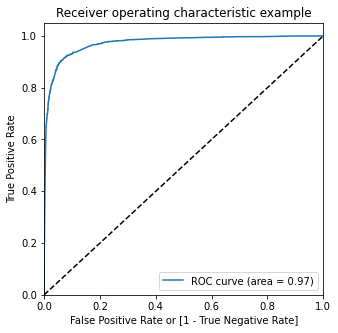

In [105]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC curve should ideally have a value close to 1, which indicates a highly accurate predictive model. In this case, we have achieved a good ROC curve value of 0.97, which suggests that our model is performing well in terms of its predictive ability.

### Finding Optimal Cutoff Point
we chose an arbitrary cut-off value of 0.5. However, to determine the best cut-off value for our model, we need to perform further analysis. The following section will address this issue.

In [106]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.983421,6676,1,1,1,1,1,1,1,1,1,1,1
1,1,0.992236,6138,1,1,1,1,1,1,1,1,1,1,1
2,1,0.991625,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.037233,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.209067,6552,0,1,1,1,0,0,0,0,0,0,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.839737  0.979789  0.753810
0.2   0.2  0.883285  0.961263  0.835443
0.3   0.3  0.920909  0.921263  0.920692
0.4   0.4  0.926033  0.903158  0.940067
0.5   0.5  0.924592  0.877053  0.953759
0.6   0.6  0.914505  0.826105  0.968742
0.7   0.7  0.909702  0.800842  0.976492
0.8   0.8  0.899936  0.766316  0.981917
0.9   0.9  0.878322  0.698526  0.988633


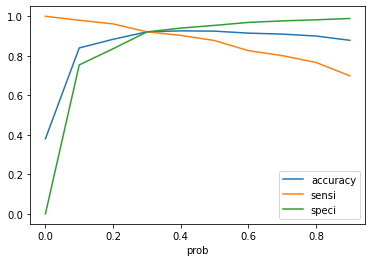

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [109]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.983421,6676,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.992236,6138,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.991625,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.037233,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.209067,6552,0,1,1,1,0,0,0,0,0,0,0,0


In [110]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.983421,6676,1,98
1,1,0.992236,6138,1,99
2,1,0.991625,8650,1,99
3,0,0.037233,3423,0,4
4,0,0.209067,6552,0,21


In [111]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9209093820044829

In [112]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3564,  307],
       [ 187, 2188]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9212631578947369

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.9206923275639369

Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
*   Accuracy : 92.10%
*   Sensitivity : 92.13%
*   Specificity : 92.06%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [116]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07930767243606303


In [117]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8769539078156313


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9501466275659824


In [119]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3564,  307],
       [ 187, 2188]], dtype=int64)

In [120]:
# Precision
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8769539078156313

In [121]:
# Recall
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9212631578947369

In [122]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8769539078156313

In [123]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9212631578947369

In [124]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

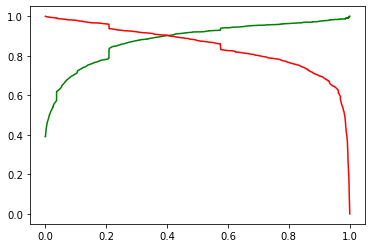

In [125]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [126]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
7625,-0.397342,2.145058,-0.164140,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5207,0.277837,0.772700,0.876565,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2390,-1.072521,-0.885722,-1.204846,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4362,-0.397342,-0.451952,-0.164140,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1023,3.991321,-0.293028,1.396918,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [127]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Specialization_Hospitality Management,Specialization_IT Projects Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Olark Chat,...,Tags_Not doing further education,Tags_Ringing,Tags_Shall take in the next coming month,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
7625,2.145058,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5207,0.772700,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2390,-0.885722,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4362,-0.451952,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1023,-0.293028,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON THE TEST SET

In [129]:
y_test_pred = res.predict(X_test_sm)

In [130]:
y_test_pred[:10]

7625    0.064796
5207    0.967623
2390    0.993757
4362    0.016951
1023    0.009517
8226    0.993225
3079    0.043723
530     0.005117
7873    0.036945
5146    0.995703
dtype: float64

In [131]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [132]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [133]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [134]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [135]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [136]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7625,0.064796
1,1,5207,0.967623
2,1,2390,0.993757
3,0,4362,0.016951
4,0,1023,0.009517


In [137]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [138]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7625,0.064796
1,1,5207,0.967623
2,1,2390,0.993757
3,0,4362,0.016951
4,0,1023,0.009517


In [139]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [140]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7625,0,0.064796,6
1,5207,1,0.967623,97
2,2390,1,0.993757,99
3,4362,0,0.016951,2
4,1023,0,0.009517,1


In [141]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [142]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7625,0,0.064796,6,0
1,5207,1,0.967623,97,1
2,2390,1,0.993757,99,1
3,4362,0,0.016951,2,0
4,1023,0,0.009517,1,0


In [143]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9133681852128454

In [144]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1530,  154],
       [  78,  916]], dtype=int64)

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9215291750503019

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.9085510688836105

In [148]:
# Let us calculate precision
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8560747663551402

In [149]:
# Let us calculate recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9215291750503019

# Final Observation:

## On Train Data-

Let us compare the below values with Train data:
*   Accuracy: 92.29%
*   Sensitivity: 91.70%
*   Specificity: 92.66%

## On Test Data-

After applying the model to the test data, these are the results we obtained.


*   Accuracy: 91.34%
*   Sensitivity: 92.15%
*   Specificity: 90.89%




##### **The model appears to accurately predict the conversion rate, which should give the CEO confidence in making informed decisions based on this model's predictions.**